In [59]:
import numpy as np
from typing import List
import warnings
from matplotlib import pyplot as plt
import random
from sklearn.utils import shuffle

from lib.Layers import Layer
from lib.Tensor import Tensor

In [45]:
class Dense(Layer):
    def __init__(self, input_dim: int, output_dim: int, lr: float = 0.01):
        self.weights = self.init_weights(input_dim, output_dim) # weights is a matrix of shape (input_dim, output_dim)
        self.bias = self.init_bias(output_dim) # bias is a matrix of shape (1, output_dim)
        self.lr = lr # learning rate
        self.input = None # save input for backward pass
    
    # initialize weights and bias
    def init_weights(self, input_dim: int, output_dim: int) -> Tensor:
        arr = np.random.randn(input_dim, output_dim) * 0.01 # initialize weights with small random numbers
        return Tensor(arr, requires_grad=True) # convert to Tensor
    
    def init_bias(self, output_dim: int) -> Tensor:
        arr = np.zeros((1, output_dim)) # initialize bias with zeros of shape (1, output_dim)
        return Tensor(arr, requires_grad=True) # convert to Tensor
    
    def parameters(self) -> List[Tensor]:
        return [self.weights, self.bias]
    
    # forward pass
    def forward(self, input_data: Tensor) -> Tensor:
        """
        Take an input tensor, multiply it with the weights and add the bias.
        
        X is a matrix of shape (batch_size, input_dim)
        W is a matrix of shape (input_dim, output_dim)
        b is a matrix of shape (1, output_dim)

        output = X @ W + b, matrix of shape (batch_size, output_dim)
        """
        if not isinstance(input_data, Tensor):
            warnings.warn(f"Input data to layer {self.__class__.__name__} is not a Tensor. Converting to Tensor.")
            input_data = Tensor(input_data, requires_grad=True)

        input_features = input_data.shape[1] # input_dim
        if input_features != self.weights.shape[0]:
            raise RuntimeError(f"Input tensor with {input_features} features should match layer input dim {self.weights.shape[0]}")

        self.input = input_data # save input for backward pass
        #? not sure if i need to handle the case where batch_size = 1, and input_data is a vector
        self.output = input_data @ self.weights + self.bias # matrix multiplication
        return self.output
    
    # backward pass
    def backward(self) -> None:
        """
        Compute and store gradients for weights and biases based on the output_gradient
        coming from the next layer. Then, compute the gradient for the inputs to be
        sent to the previous layer.

        output_gradient is a tensor of shape (batch_size, output_dim)

        Note: The actual gradient computation and updates are handled by the Tensor class.
        This method is left intentionally brief.
        """

        if self.output.grad is None:
            raise RuntimeError("No gradient found. You might need to call backward on the loss Tensor first.")

In [46]:
class Optimizer:
    """
    Base class for all optimizers.
    """
    def __init__(self):
        self.lr = None

    def step(self) -> None:
        raise NotImplementedError
    
    def zero_grad(self) -> None:
        raise NotImplementedError
    
class SGD(Optimizer):
    """
    Stochastic gradient descent optimizer.
    """
    def __init__(self, params: List[Tensor], lr: float):
        self.lr = lr
        self.params = params
    
    def step(self) -> None:
        for param in self.params:
            if param.requires_grad:
                param.data = param.data - self.lr * param.grad # subtract becase we are minimizing loss
                # param.data -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.requires_grad:
                param.zero_grad()

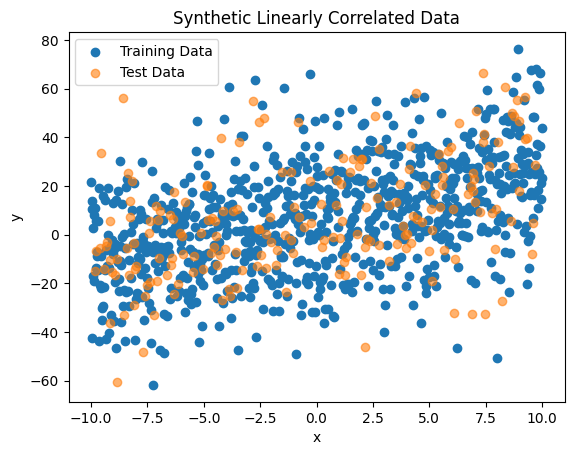

In [61]:
n_samples = 1000

x = np.linspace(-10, 10, n_samples) # 100 samples between -10 and 10

# generate y = 2x + 1
y = 2 * x + 1
# add noise
y += np.random.normal(5, 20, n_samples)


# reshape x and y to be column vectors
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x, y = shuffle(x, y, random_state=0)

# split into train and test sets
train_split = int(0.8 * n_samples)
test_split = n_samples - train_split

train_x, test_x = x[:train_split], x[train_split:]
train_y, test_y = y[:train_split], y[train_split:]

train_inputs = Tensor(train_x, requires_grad=True)
train_targets = Tensor(train_y, requires_grad=True)

test_inputs = Tensor(test_x, requires_grad=True)
test_targets = Tensor(test_y, requires_grad=True)

# Plot
plt.scatter(train_x, train_y, label="Training Data")
plt.scatter(test_x, test_y, label="Test Data", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title('Synthetic Linearly Correlated Data')
plt.show()

In [83]:
layer = Dense(1, 1)
optimizer = SGD([layer.weights, layer.bias], lr=0.00001)

running_epoch_loss = []

for epoch in range (10000):
    optimizer.zero_grad() # zero out gradients
    
    out = layer(train_inputs) # forward pass
    # print(out.sum())
    loss = ((out - train_targets) ** 2).sum() # Total Squared Error loss
    loss.backward() # compute gradients
    optimizer.step() # update weights and bias

    epoch_loss = loss.data / n_samples

    # if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {epoch_loss :.04f}")
    running_epoch_loss.append(epoch_loss)

Epoch: 0, Loss: 459.0540
Epoch: 1, Loss: 385.5420
Epoch: 2, Loss: 369.4229
Epoch: 3, Loss: 365.8796
Epoch: 4, Loss: 365.0918
Epoch: 5, Loss: 364.9077
Epoch: 6, Loss: 364.8560
Epoch: 7, Loss: 364.8333
Epoch: 8, Loss: 364.8169
Epoch: 9, Loss: 364.8019
Epoch: 10, Loss: 364.7873
Epoch: 11, Loss: 364.7726
Epoch: 12, Loss: 364.7581
Epoch: 13, Loss: 364.7435
Epoch: 14, Loss: 364.7289
Epoch: 15, Loss: 364.7143
Epoch: 16, Loss: 364.6997
Epoch: 17, Loss: 364.6851
Epoch: 18, Loss: 364.6705
Epoch: 19, Loss: 364.6559
Epoch: 20, Loss: 364.6413
Epoch: 21, Loss: 364.6268
Epoch: 22, Loss: 364.6122
Epoch: 23, Loss: 364.5976
Epoch: 24, Loss: 364.5830
Epoch: 25, Loss: 364.5684
Epoch: 26, Loss: 364.5538
Epoch: 27, Loss: 364.5393
Epoch: 28, Loss: 364.5247
Epoch: 29, Loss: 364.5101
Epoch: 30, Loss: 364.4955
Epoch: 31, Loss: 364.4809
Epoch: 32, Loss: 364.4664
Epoch: 33, Loss: 364.4518
Epoch: 34, Loss: 364.4372
Epoch: 35, Loss: 364.4226
Epoch: 36, Loss: 364.4080
Epoch: 37, Loss: 364.3935
Epoch: 38, Loss: 364.3

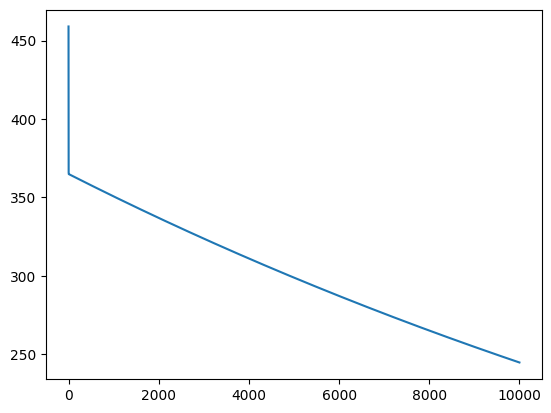

In [84]:
plt.plot(running_epoch_loss)

In [86]:
running_test_loss =[]
for inputs, targets in zip(test_inputs.data, test_targets.data):
    out = layer(inputs)
    loss = ((out - targets) ** 2).sum()
    running_test_loss.append(loss.data / n_samples)

plt.plot(running_test_loss)

/var/folders/6t/m1cj5jqd1cx9xq5bxs_h3g200000gn/T/ipykernel_53814/2620119600.py:32: UserWarning: Input data to layer Dense is not a Tensor. Converting to Tensor.
  warnings.warn(f"Input data to layer {self.__class__.__name__} is not a Tensor. Converting to Tensor.")


IndexError: tuple index out of range

'Dense'